In [ ]:
# TP3: PCA - PRINCIPAL COMPONENT ANALYSIS (Using sklearn library)
# Purpose: Same as TP2 but using sklearn's built-in PCA implementation
# Advantage: Simpler code, optimized performance, more features
# Use case: Dimensionality reduction, data visualization, feature extraction


In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For plotting and visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# STEP 1: Load the dataset
dataset = pd.read_csv("C:/Users/ASUS/Downloads/acp.csv")
print(dataset)


    x1   x2
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9


In [5]:
# STEP 2: Apply PCA with all components using sklearn
from sklearn.decomposition import PCA

pca = PCA()  # Create PCA object (no n_components means keep all)
# fit_transform: centers data, computes PCs, and transforms data in one step
x_pca = pca.fit_transform(dataset)
x_pca = pd.DataFrame(data=x_pca, columns=['z1','z2'])
x_pca  # Display transformed data (PC scores)


,z1,z2
0,0.827970,0.175115
1,-1.777580,-0.142857
2,0.992197,-0.384375
3,0.274210,-0.130417
4,1.675801,0.209498
5,0.912949,-0.175282
6,-0.099109,0.349825
7,-1.144572,-0.046417
8,-0.438046,-0.017765
9,-1.223821,0.162675


In [6]:
# STEP 3: Examine PCA results
# explained_variance_: eigenvalues (variance explained by each PC)
print(pca.explained_variance_)
# components_: eigenvectors (principal component directions)
print(pca.components_)
# Repeated to show importance
print(pca.explained_variance_)


[1.28402771 0.0490834 ]
[[ 0.6778734   0.73517866]
 [ 0.73517866 -0.6778734 ]]
[1.28402771 0.0490834 ]


In [7]:
# STEP 4: Reconstruct original data from all PCs
# inverse_transform: converts PC scores back to original space
x_rec = pca.inverse_transform(x_pca)
x_rec  # Should be very close to original data (all PCs used)


,0,1
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


In [8]:
# STEP 5: Apply PCA keeping only 1 component (dimensionality reduction)
pca2 = PCA(n_components=1)  # Keep only first PC
x_pca2 = pca2.fit_transform(dataset)  # Transform to 1D
pca2.components_  # Show the first principal component direction

print(x_pca2)  # Display 1D representation


[[ 0.82797019]
 [-1.77758033]
 [ 0.99219749]
 [ 0.27421042]
 [ 1.67580142]
 [ 0.9129491 ]
 [-0.09910944]
 [-1.14457216]
 [-0.43804614]
 [-1.22382056]]


In [9]:
# STEP 6: Reconstruct data from 1 PC only
# This shows approximation/projection of data onto first PC
x_rec2 = pca2.inverse_transform(x_pca2)
x_rec2  # Reconstructed 2D data from 1D (with information loss)


array([[2.37125896, 2.51870601],
       [0.60502558, 0.60316089],
       [2.48258429, 2.63944242],
       [1.99587995, 2.11159364],
       [2.9459812 , 3.14201343],
       [2.42886391, 2.58118069],
       [1.74281635, 1.83713686],
       [1.03412498, 1.06853498],
       [1.51306018, 1.58795783],
       [0.9804046 , 1.01027325]])

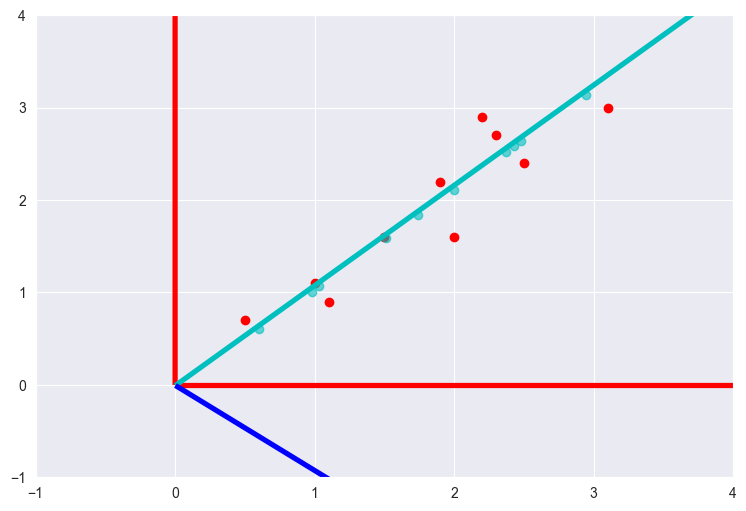

In [10]:
# STEP 7: Visualize PCA results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9, 6)  # Set figure size

# Plot original data points in red
plt.scatter(dataset['x1'], dataset['x2'], c='red', label='Original Data')

# Plot reconstructed data (projection on PC1) in cyan
plt.scatter(x_rec2[:, 0], x_rec2[:, 1], c='c', alpha=0.6)

# Draw original axes (red arrows)
plt.quiver(0, 0, 0, 1, angles="xy", scale=1, color="red")  # Y-axis
plt.quiver(0, 0, 1, 0, angles="xy", scale=1, color="red")  # X-axis

# Draw principal component axes
# PC1 (cyan): direction of maximum variance
plt.quiver(0, 0, pca.components_[0,0], pca.components_[0,1], angles="xy", scale=1, color='c')
# PC2 (blue): orthogonal to PC1
plt.quiver(0, 0, pca.components_[1,0], pca.components_[1,1], angles="xy", scale=1, color='b')

plt.xlim(-1, 4)  # Set x-axis limits
plt.ylim(-1, 4)  # Set y-axis limits
plt.show()